In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
print(keras.__version__)

2.1.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1
2.2.4-tf


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:

training_data = np.load('training_data.npy', allow_pickle=True)
x_train = []
y_train = []

for x in range(len(training_data)):
    x_train.append(training_data[x][0])
    y_train.append(training_data[x][1][:6])
    
x_train = np.array(x_train, dtype=np.float16)
y_train = np.array(y_train, dtype=np.float16)



In [3]:
print(x_train[0][0][0][0])
for a in range(len(x_train)):
    for b in range(len(x_train[a])):
        for c in range(len(x_train[a][b])):
                x_train[a][b][c]  =  x_train[a][b][c] / 255

print(x_train[0][0][0][0])

[218. 190. 176.]
[0.855  0.745  0.6904]


In [13]:
from keras.models import Sequential
from keras.layers import TimeDistributed, LSTM, Flatten, Dense, InputLayer, MaxPooling2D, Dropout, Activation, Embedding, GRU, ConvLSTM2D
from keras.layers.convolutional import Convolution2D
from keras import optimizers
from keras.models import load_model
from keras import initializers

model = Sequential()


model.add(TimeDistributed(Convolution2D(32, (4,4), data_format='channels_last'), input_shape=(3, 128, 256, 3)))
model.add(TimeDistributed(Activation('relu')))
print(model.output_shape)

model.add(TimeDistributed(Convolution2D(32, (4,4), data_format='channels_last')))
model.add(TimeDistributed(Activation('relu')))
print(model.output_shape)

model.add(TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last')))
model.add(TimeDistributed(Dropout(0.25)))
print(model.output_shape)

model.add(TimeDistributed(Convolution2D(16, (3,3), data_format='channels_last')))
model.add(TimeDistributed(Activation('relu')))
print(model.output_shape)


model.add(TimeDistributed(MaxPooling2D(pool_size=(5, 5), data_format='channels_last')))
model.add(TimeDistributed(Dropout(0.25)))
print(model.output_shape)

model.add(TimeDistributed(Flatten()))
print(model.output_shape)

model.add(LSTM(256, kernel_initializer=initializers.RandomNormal(stddev=0.001))) #128
model.add(Dropout(0.25))
print(model.output_shape)

model.add(Dense(100))
print(model.output_shape)

model.add(Dense(80))
print(model.output_shape)

model.add(Dense(40))
print(model.output_shape)

model.add(Dense(6, activation='sigmoid'))
print(model.output_shape)

model.summary()


(None, 3, 125, 253, 32)
(None, 3, 122, 250, 32)
(None, 3, 24, 50, 32)
(None, 3, 22, 48, 16)
(None, 3, 4, 9, 16)
(None, 3, 576)
(None, 256)
(None, 100)
(None, 80)
(None, 40)
(None, 6)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_34 (TimeDis (None, 3, 125, 253, 32)   1568      
_________________________________________________________________
time_distributed_35 (TimeDis (None, 3, 125, 253, 32)   0         
_________________________________________________________________
time_distributed_36 (TimeDis (None, 3, 122, 250, 32)   16416     
_________________________________________________________________
time_distributed_37 (TimeDis (None, 3, 122, 250, 32)   0         
_________________________________________________________________
time_distributed_38 (TimeDis (None, 3, 24, 50, 32)     0         
_________________________________________________________________
tim

In [14]:
opt = optimizers.RMSprop(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,
          batch_size=10,
          epochs=10,
          verbose=1)



Epoch 1/10
17910/17910 [==============================] - 112s 6ms/step - loss: 0.1149 - accuracy: 0.4257
Epoch 2/10
17910/17910 [==============================] - 111s 6ms/step - loss: 0.0917 - accuracy: 0.5917
Epoch 3/10
17910/17910 [==============================] - 131s 7ms/step - loss: 0.0801 - accuracy: 0.66020s - loss:
Epoch 4/10
17910/17910 [==============================] - 120s 7ms/step - loss: 0.0720 - accuracy: 0.7016
Epoch 5/10
17910/17910 [==============================] - 131s 7ms/step - loss: 0.0667 - accuracy: 0.7243
Epoch 6/10
17910/17910 [==============================] - 129s 7ms/step - loss: 0.0621 - accuracy: 0.7506
Epoch 7/10
17910/17910 [==============================] - 279s 16ms/step - loss: 0.0582 - accuracy: 0.7658
Epoch 8/10
17910/17910 [==============================] - 374s 21ms/step - loss: 0.0549 - accuracy: 0.7801
Epoch 9/10
17910/17910 [==============================] - 372s 21ms/step - loss: 0.0536 - accuracy: 0.7857
Epoch 10/10
17910/17910 [========

In [16]:
model.save("model_complete.h5")

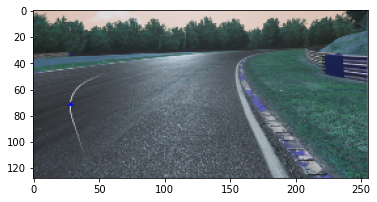

In [12]:
plt.imshow(training_data[0][0][0])